# Data Set Information:

The dataset includes 244 instances that regroup a data of two regions of Algeria,namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.

122 instances for each region.

The period from June 2012 to September 2012.
The dataset includes 11 attribues and 1 output attribue (class)
The 244 instances have been classified into â€˜fireâ€™ (138 classes) and â€˜not fireâ€™ (106 classes) classes.

# Steps:-
1.Data Cleaning

2.Handling Nan values

3.EDA

4.Visualization of Data using pyplot

5.Finding Outliers

6.Handling Outliers

7.Correlation

8.Model building for -Classification

9.Model building for -Regression

# Data Cleaning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv("C:/Users/Swarupa/Desktop/ML-Algeria-forest project/Algerian_forest_fires_dataset_UPDATE.csv")
dataset.head(3)

,,,,,,,,,,,,,Bejaia Region Dataset
day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire


In [3]:
# Removing extra header -Bejaia Region Dataset
data = pd.read_csv("C:/Users/Swarupa/Desktop/ML-Algeria-forest project/Algerian_forest_fires_dataset_UPDATE.csv",header=1)
data.head(4)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire


In [4]:
print(len(data.columns), "= Length of the column")
print((data.shape),"= Shape of the column")

14 = Length of the column
(246, 14) = Shape of the column


In [5]:
# Droping extra header and empty row in middle of dataset
data = data.drop(index=[122,123,124])

In [6]:
print((data.shape),"= New Shape of the column")

(243, 14) = New Shape of the column


In [7]:
data.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

In [8]:
#Removing whitespace from columns
data=data.rename(columns={data.columns[13]: 'Classes'})
data=data.rename(columns={data.columns[6]: 'Rain'})
data=data.rename(columns={data.columns[5]: 'Ws'})
data=data.rename(columns={data.columns[4]: 'RH'})

In [9]:
data['Classes'].head()

0    not fire   
1    not fire   
2    not fire   
3    not fire   
4    not fire   
Name: Classes, dtype: object

# Handling Nan values

In [10]:
data.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
dtype: int64

-- From above information we can see that only one feature 'Classes' have missing values

In [11]:
features_nan = [features for features in data.columns if data[features].isnull().sum()>=1]
features_nan

['Classes']

In [12]:
#applying for loop for all the features in nan & 4 means 4 decimal for rounding off
for features in features_nan:
    print(features,np.round(data[features].isnull().mean()*100,4),'-->% missing value')

Classes 0.4115 -->% missing value


In [13]:
#Using Mode to handle nan values.
data['Classes'] = data['Classes'].fillna(data['Classes'].mode()[0])

In [14]:
features_nan = [features for features in data.columns if data[features].isnull().sum()>=1]
features_nan

[]

# EDA

1.Seprating Numerical and Categorical Features

2.Seprating Continous and Discrete Features from Numerical Feature.

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 0 to 245
Data columns (total 14 columns):
day            243 non-null object
month          243 non-null object
year           243 non-null object
Temperature    243 non-null object
RH             243 non-null object
Ws             243 non-null object
Rain           243 non-null object
FFMC           243 non-null object
DMC            243 non-null object
DC             243 non-null object
ISI            243 non-null object
BUI            243 non-null object
FWI            243 non-null object
Classes        243 non-null object
dtypes: object(14)
memory usage: 28.5+ KB


In [16]:
# In FWI and DC column some wrong data are replaced with values

In [17]:
print('fire   ' in data['FWI'])

False


In [18]:
data['FWI'] = data['FWI'].replace(['fire   '],'8.9')

In [19]:
print('14.6 9' in data['DC'].unique())

True


In [20]:
data['DC'] = data['DC'].replace(['14.6 9'],'14.6')

-- changing datatype of some features into int and float

In [21]:
convert_dict = {'day':int,
                'month':int,
                'Temperature': int,
                'RH': int,
                'Ws': int,
                'Rain': float,
                'FFMC': float,
                'DMC': float,
                'ISI': float,
                'FWI': float,
                'DC': float,
                'BUI': float
                }
 
data = data.astype(convert_dict)
print(data.dtypes)

day              int32
month            int32
year            object
Temperature      int32
RH               int32
Ws               int32
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes         object
dtype: object


In [22]:
# The year feature has only one type of data so we can delete that
data['year'].unique()

array(['2012'], dtype=object)

In [23]:
data=data.drop(columns=['year'])

In [24]:
data.head(2)

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire


In [25]:
categorical_features=[feature for feature in data.columns if data[feature].dtypes=='O']
categorical_features

['Classes']

In [26]:
data[categorical_features].head()

,Classes
0,not fire
1,not fire
2,not fire
3,not fire
4,not fire


In [27]:
numerical_features=[feature for feature in data.columns if data[feature].dtypes!='O']
numerical_features

['day',
 'month',
 'Temperature',
 'RH',
 'Ws',
 'Rain',
 'FFMC',
 'DMC',
 'DC',
 'ISI',
 'BUI',
 'FWI']

In [28]:
data[numerical_features].head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4
2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5


In [29]:
#Numrical varibles - 2 types
#1. continuous varible 2. Discrete varible

discrete_feature=[feature for feature in numerical_features if len(data[feature].unique())<=25]
discrete_feature

['month', 'Temperature', 'Ws']

In [30]:
#Continuous variable
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
continuous_feature

['day', 'RH', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 0 to 245
Data columns (total 13 columns):
day            243 non-null int32
month          243 non-null int32
Temperature    243 non-null int32
RH             243 non-null int32
Ws             243 non-null int32
Rain           243 non-null float64
FFMC           243 non-null float64
DMC            243 non-null float64
DC             243 non-null float64
ISI            243 non-null float64
BUI            243 non-null float64
FWI            243 non-null float64
Classes        243 non-null object
dtypes: float64(7), int32(5), object(1)
memory usage: 31.8+ KB


In [32]:
#Removing whitespace of this feature value
data['Classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

In [33]:
# data=data.rename(columns={data.columns[13]: 'Classes'})
data['Classes'] = data['Classes'].str.strip()

In [34]:
data['Classes'].unique()

array(['not fire', 'fire'], dtype=object)

In [35]:
# Mapping Classes categorical features into numerical feature
data['Classes'] = data['Classes'].map({'not fire':0, 'fire':1})

In [36]:
data['Classes'].unique()

array([0, 1], dtype=int64)

In [37]:
data.head(3)

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0
2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0


# Visulization of data using pyplot.

In [38]:
data1 = data.copy()
data1.head(3)

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0
2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0


In [39]:
data1.skew()

day            0.001650
month         -0.006553
Temperature   -0.196502
RH            -0.231397
Ws             0.542634
Rain           4.569444
FFMC          -1.345678
DMC            1.525479
DC             1.474820
ISI            1.118393
BUI            1.456478
FWI            1.141945
Classes       -0.275850
dtype: float64

The variables with skewness > 1 such as Rain,FWI,BUI,ISI,DC,DMC are highly positively skewed.

The variables with skewness < -1 such as FFMC are highly negatively skewed.

The variables with 0.5 < skewness < 1 such as Ws are moderately positively skewed.

The variables with -0.5 < skewness < -1 are negatively skewed.

And, the variables with -0.5 < skewness < 0.5 are symmetric i.e normally distributed such as Temperature,RH,Classes,day,month.

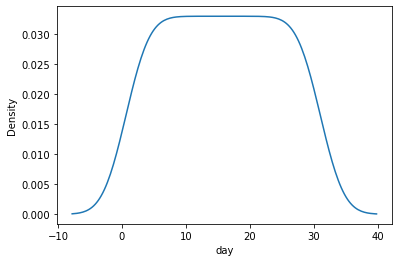

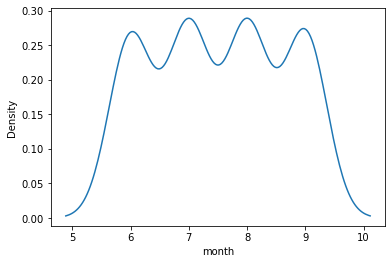

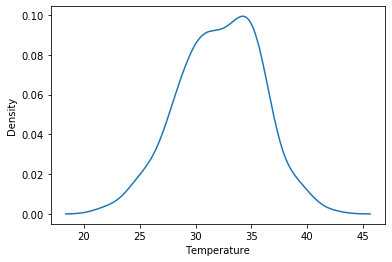

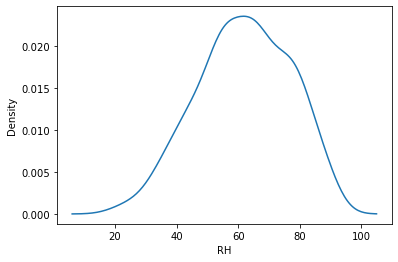

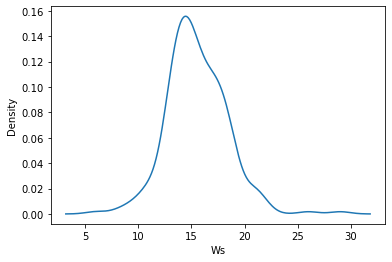

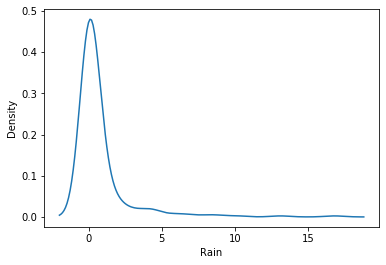

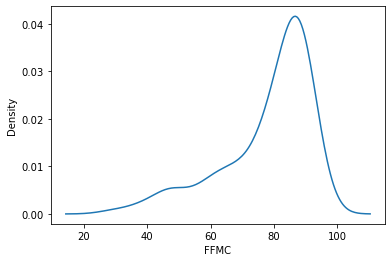

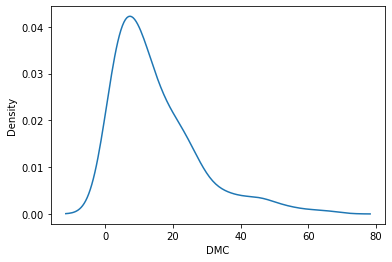

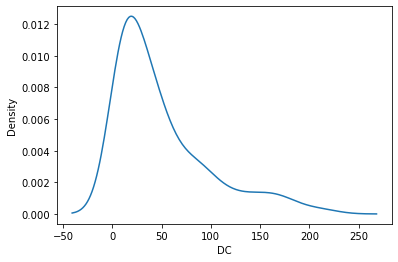

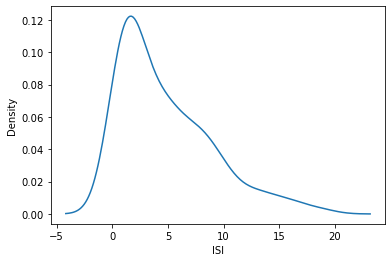

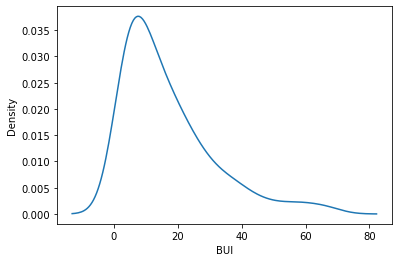

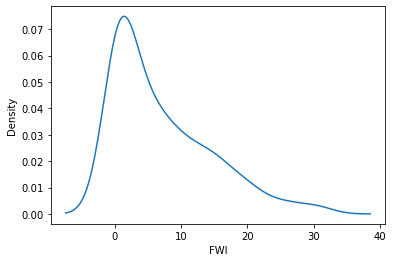

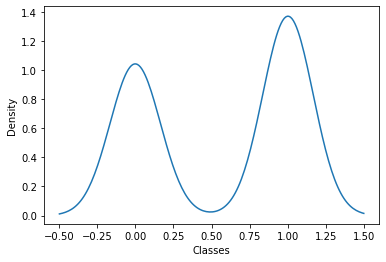

In [40]:
for feature in data1:
    sns.kdeplot(data1[feature])
    plt.show()

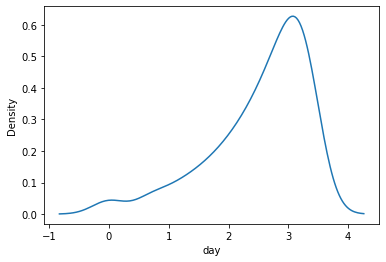

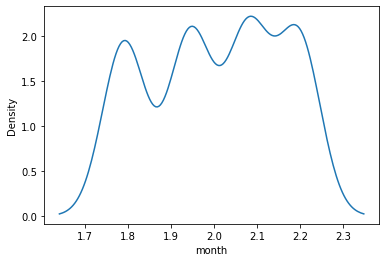

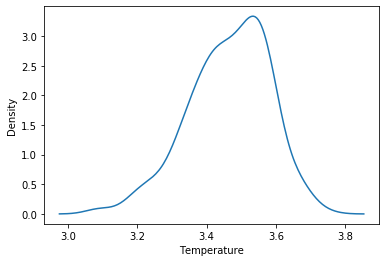

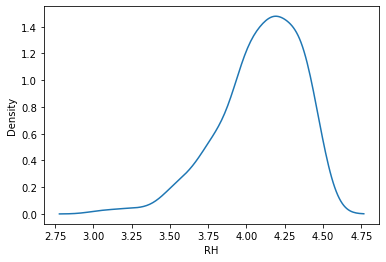

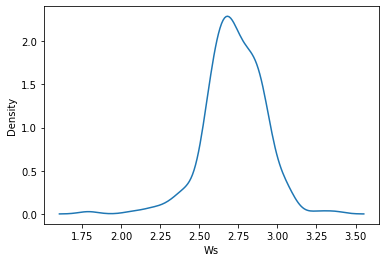

C:\Users\Swarupa\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


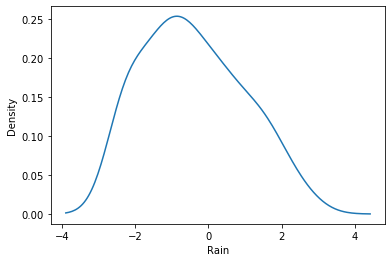

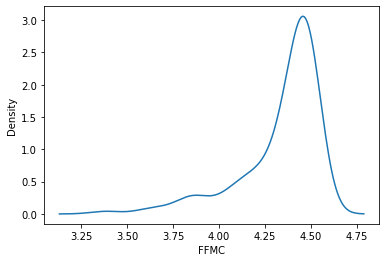

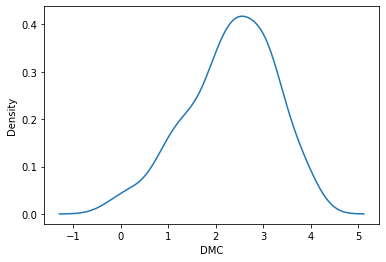

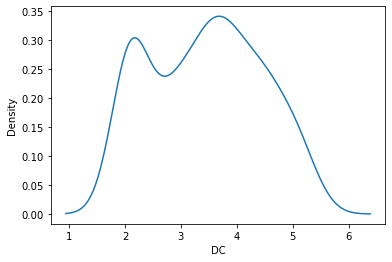

C:\Users\Swarupa\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


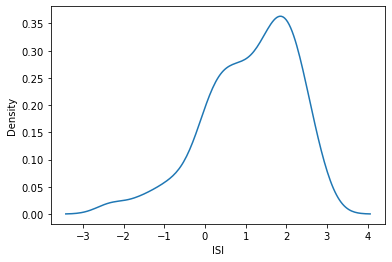

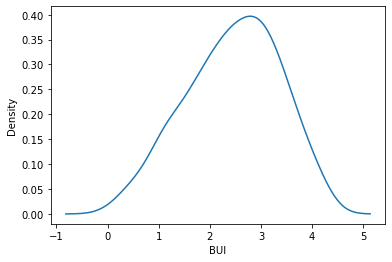

C:\Users\Swarupa\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


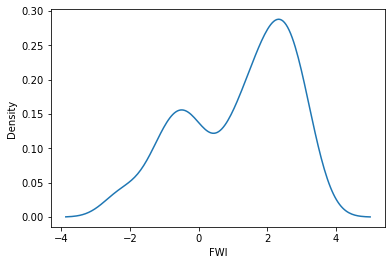

C:\Users\Swarupa\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Swarupa\Anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


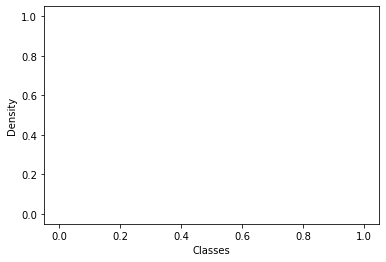

In [41]:
# Converting log normal to normal distribution
for feature in data1:
    data1[feature]=np.log(data1[feature])
    sns.kdeplot(data1[feature])
    plt.show()

Observation - It is clearly visibal that after log transformation features like - Rain,month,DMC,DC,ISI,BUI,FWI converted from log normal distribution to normal distribution

--Visulalization of realtion between discrete feature and Classes

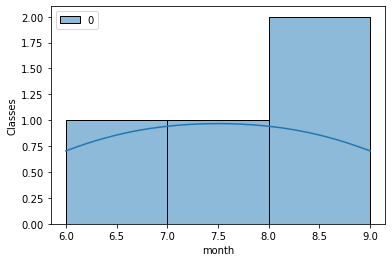

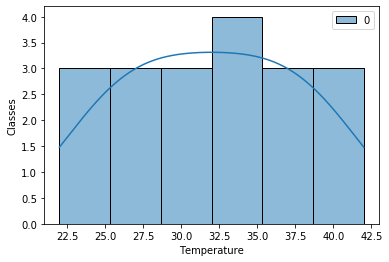

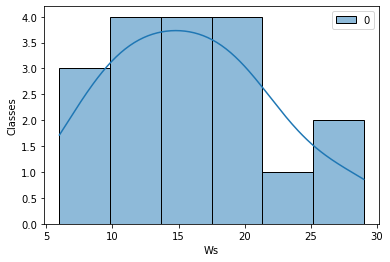

In [42]:
data1=data.copy()
for feature in discrete_feature:
    sns.histplot(data1.groupby(feature)['Classes'],kde=True)
    plt.xlabel(feature)
    plt.ylabel("Classes")
    plt.show()

--Visulalization of realtion between continuous_feature and classes

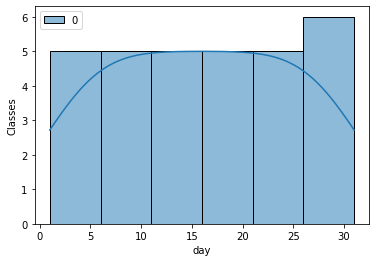

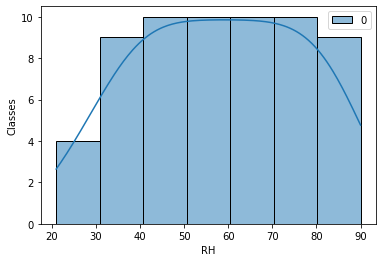

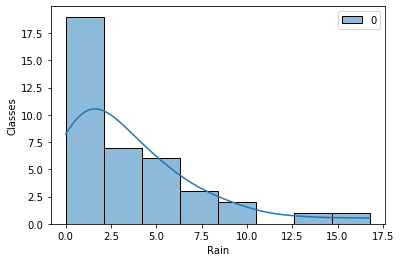

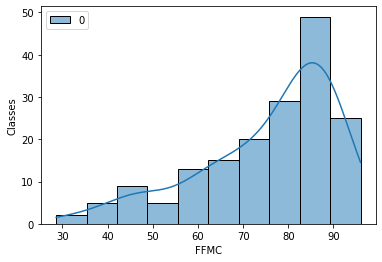

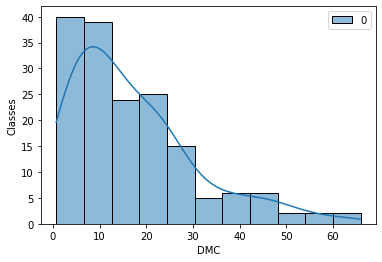

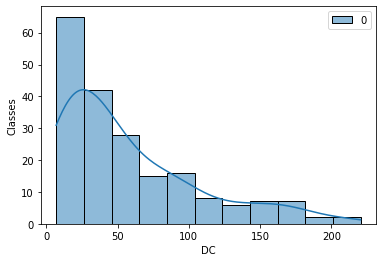

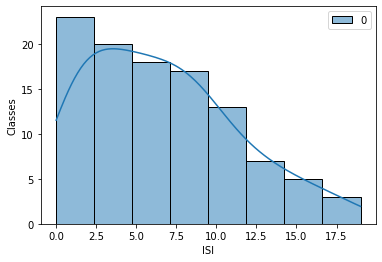

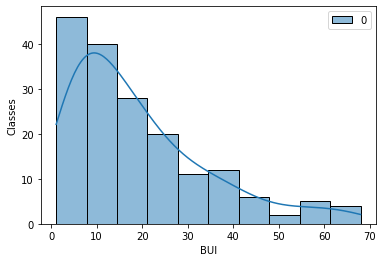

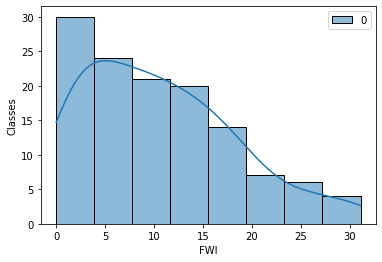

In [43]:
data1=data.copy()
for feature in continuous_feature:
    sns.histplot(data1.groupby(feature)['Classes'],kde=True)
    plt.xlabel(feature)
    plt.ylabel("Classes")
    plt.show()

# Outliers

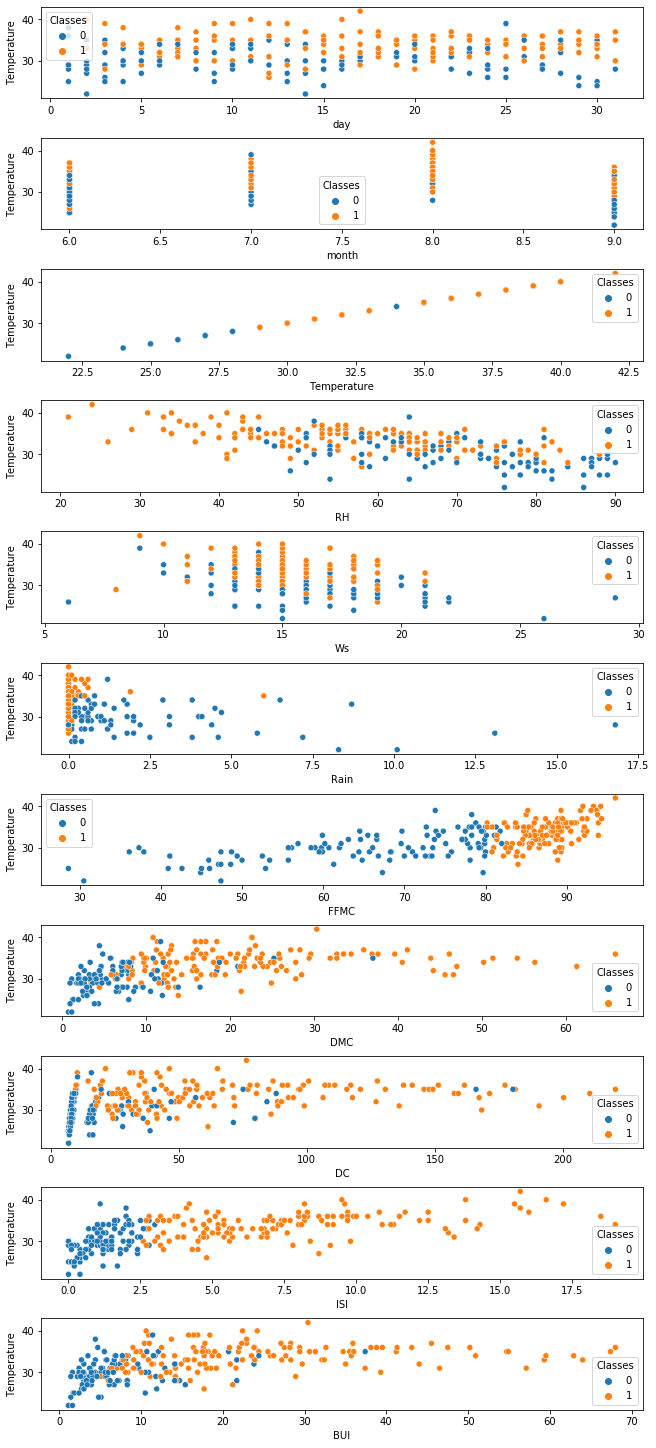

In [44]:
data1=data.copy()
fig,ax= plt.subplots(11,figsize=(9,20),constrained_layout = True)
count = 0
for i in data1.columns[0:-2]:
    sns.scatterplot(x=i,y='Temperature',data = data1, ax=ax[count],hue ='Classes')
    count+=1

Observation For features BUI = <5, ISI =<2.5, CD =<10, DMC =<10 are high changes of getting fire as it shows orange plots.

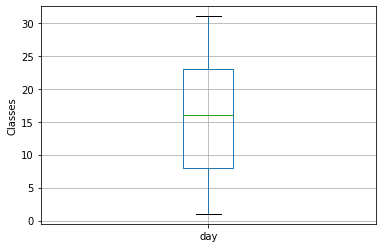

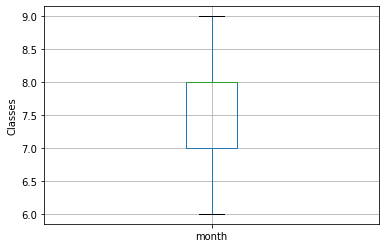

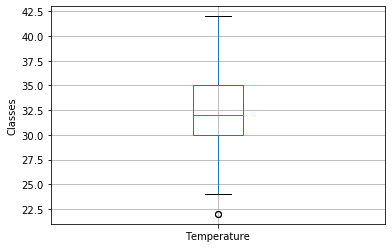

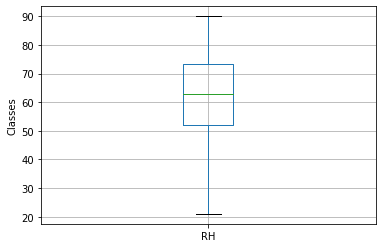

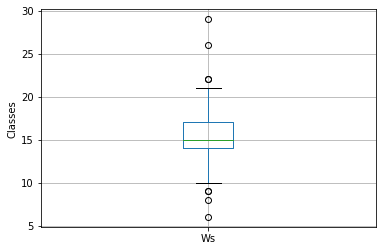

C:\Users\Swarupa\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


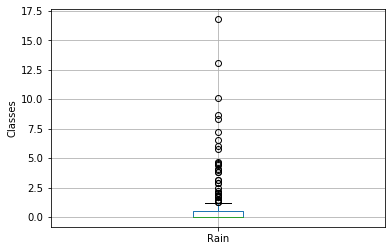

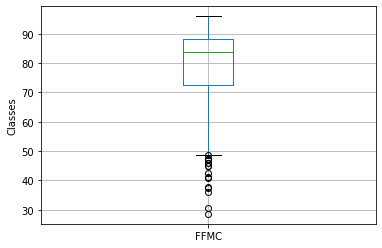

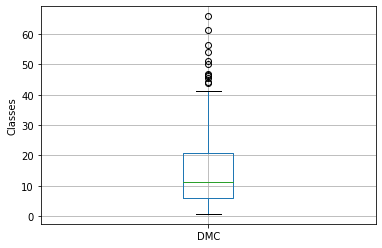

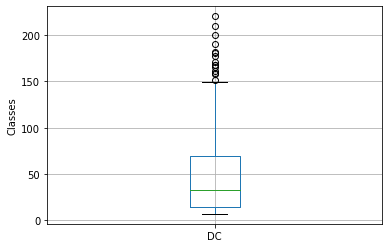

C:\Users\Swarupa\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


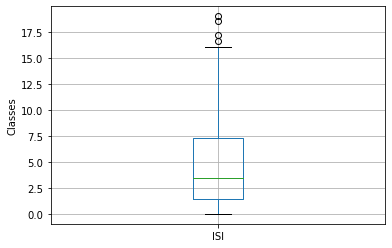

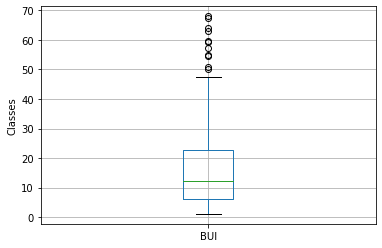

C:\Users\Swarupa\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


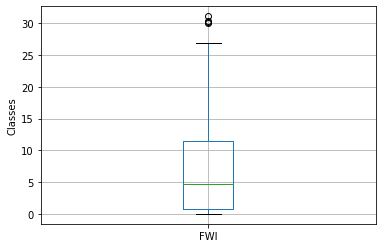

C:\Users\Swarupa\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


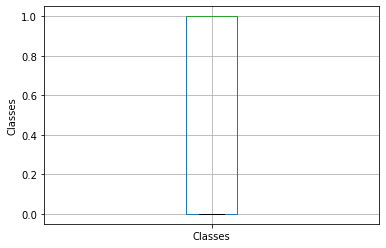

In [45]:
#Outliers 
for feature in data:
        data1[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel('Classes')
        plt.show()

Observation - By observing above boxplot features like - ISI,Rain,BUI,DC,DMC,FFMC,WS have ouliers.

In [46]:
outlier_data = data[['Rain','BUI','DC','DMC','FFMC','Ws']].copy()

In [47]:
outlier_data.head()

,Rain,BUI,DC,DMC,FFMC,Ws
0,0.0,3.4,7.6,3.4,65.7,18
1,1.3,3.9,7.6,4.1,64.4,13
2,13.1,2.7,7.1,2.5,47.1,22
3,2.5,1.7,6.9,1.3,28.6,13
4,0.0,3.9,14.2,3.0,64.8,16


In [48]:
outlier_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 0 to 245
Data columns (total 6 columns):
Rain    243 non-null float64
BUI     243 non-null float64
DC      243 non-null float64
DMC     243 non-null float64
FFMC    243 non-null float64
Ws      243 non-null int32
dtypes: float64(5), int32(1)
memory usage: 12.3 KB


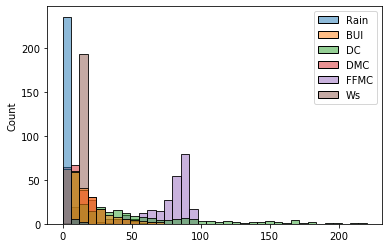

In [49]:
sns.histplot(outlier_data)
plt.show()

IQR-

In [50]:
def find_outliers_IQR(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    IQR = q3-q1
    outliers = data[((data<(q1-1.5*IQR)) |  (data>(q3+1.5*IQR)))]
    return outliers

In [51]:
BUI_outliers = find_outliers_IQR(data['BUI'])

print("number of outliers: "+ str(len(BUI_outliers)))

print("max outlier value: "+ str(BUI_outliers.max()))

print("min outlier value: "+ str(BUI_outliers.min()))

number of outliers: 11
max outlier value: 68.0
min outlier value: 50.2


In [52]:
rain_outliers = find_outliers_IQR(data['Rain'])

print("number of outliers: "+ str(len(rain_outliers)))

print("max outlier value: "+ str(rain_outliers.max()))

print("min outlier value: "+ str(rain_outliers.min()))

number of outliers: 35
max outlier value: 16.8
min outlier value: 1.3


In [53]:
DC_outliers = find_outliers_IQR(data['DC'])

print("number of outliers: "+ str(len(DC_outliers)))

print("max outlier value: "+ str(DC_outliers.max()))

print("min outlier value: "+ str(DC_outliers.min()))

number of outliers: 15
max outlier value: 220.4
min outlier value: 151.3


In [54]:
DMC_outliers = find_outliers_IQR(data['DMC'])

print("number of outliers: "+ str(len(DMC_outliers)))

print("max outlier value: "+ str(DMC_outliers.max()))

print("min outlier value: "+ str(DMC_outliers.min()))

number of outliers: 12
max outlier value: 65.9
min outlier value: 43.9


In [55]:
Ws_outliers = find_outliers_IQR(data['Ws'])

print("number of outliers: "+ str(len(Ws_outliers)))

print("max outlier value: "+ str(Ws_outliers.max()))

print("min outlier value: "+ str(Ws_outliers.min()))

number of outliers: 8
max outlier value: 29
min outlier value: 6


In [56]:
FFMC_outliers = find_outliers_IQR(data['FFMC'])

print("number of outliers: "+ str(len(FFMC_outliers)))

print("max outlier value: "+ str(FFMC_outliers.max()))

print("min outlier value: "+ str(FFMC_outliers.min()))

number of outliers: 17
max outlier value: 48.6
min outlier value: 28.6


# Replace outliers using imputation 

Use a function to find the outliers using IQR and replace them with the mean value. Name it impute_outliers_IQR. In the function, we can get an upper limit and a lower limit using the .max() and .min() functions respectively.
After calculating the upper and lower limit, we use the numpy .where() function to apply the limits to outlier_data.

In [57]:
def impute_outliers_IQR(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    IQR =q3-q1
    upper = data[~(data>(q3+1.5*IQR))].max()
    lower = data[~(data>(q3-1.5*IQR))].min()
    data = np.where(data>upper,data.mean(),np.where(data<lower,data.mean,data))
    return data

In [58]:
for i in outlier_data:
    outlier_data[i] = impute_outliers_IQR(outlier_data[i])
#     print(outlier_data[i])

In [59]:
outlier_data.describe()

,Rain,BUI,DC,DMC,FFMC,Ws
count,243.0,243.000000,243.000000,243.000000,243.0,243.0
unique,14.0,164.000000,184.000000,155.000000,172.0,16.0
top,0.0,16.721811,49.457202,14.723457,88.9,14.0
freq,133.0,11.000000,15.000000,12.000000,8.0,43.0


In [60]:
outlier_data['Rain'].unique()

array([0.0, 0.760905349794238, 0.2, 1.2, 0.5, 0.7, 0.6, 0.3, 0.1, 0.4,
       1.0, 0.8, 0.9, 1.1], dtype=object)

In [61]:
outlier_data['FFMC'].unique()

array([65.7, 64.4, 47.1, 28.6, 64.8, 82.6, 88.2, 86.6, 52.9, 73.2, 84.5,
       84.0, 50.0, 59.0, 49.4, 36.1, 37.3, 56.9, 79.9, 59.8, 81.0, 79.1,
       81.4, 85.9, 86.7, 86.8, 89.0, 89.1, 88.7, 59.9, 55.7, 63.1, 80.1,
       87.0, 80.0, 85.6, 66.6, 81.1, 75.1, 81.8, 73.9, 60.7, 72.6, 82.8,
       85.4, 88.1, 73.4, 68.2, 70.0, 84.3, 89.2, 90.3, 86.5, 87.2, 78.8,
       78.0, 76.6, 85.0, 86.4, 77.1, 87.4, 88.9, 81.3, 82.4, 80.2, 89.3,
       89.4, 88.3, 88.6, 89.5, 85.8, 84.9, 90.1, 72.7, 52.5, 46.0, 30.5,
       42.6, 68.4, 80.8, 75.8, 69.6, 62.0, 56.1, 58.5, 71.0, 40.9, 47.4,
       44.9, 78.1, 87.7, 83.8, 87.8, 77.8, 73.7, 68.3, 48.6, 82.0, 85.7,
       77.5, 45.0, 48.7, 79.4, 83.7, 71.4, 90.6, 72.3, 53.4, 66.8, 62.2,
       65.5, 64.6, 60.2, 86.2, 78.3, 74.2, 85.3, 86.0, 92.5, 79.7, 63.7,
       87.6, 84.7, 88.0, 90.5, 82.3, 74.8, 85.2, 84.6, 86.1, 89.9, 93.9,
       91.5, 87.3, 72.8, 73.8, 87.5, 93.3, 93.7, 93.8, 70.5, 69.7, 91.7,
       94.2, 93.0, 91.9, 83.9, 92.0, 96.0, 94.3, 82

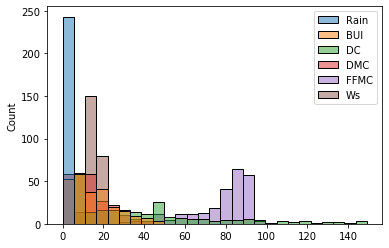

In [62]:
sns.histplot(outlier_data)
plt.show()

In [63]:
outlier_data.head()

,Rain,BUI,DC,DMC,FFMC,Ws
0,0,3.4,7.6,3.4,65.7,18
1,0.760905,3.9,7.6,4.1,64.4,13
2,0.760905,2.7,7.1,2.5,47.1,15.5185
3,0.760905,1.7,6.9,1.3,28.6,13
4,0,3.9,14.2,3,64.8,16


In [64]:
data.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0
2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0


In [65]:
col_outliner = outlier_data[["Rain","BUI","DC","DMC","FFMC","Ws"]]
col_outliner

,Rain,BUI,DC,DMC,FFMC,Ws
0,0,3.4,7.6,3.4,65.7,18
1,0.760905,3.9,7.6,4.1,64.4,13
2,0.760905,2.7,7.1,2.5,47.1,15.5185
3,0.760905,1.7,6.9,1.3,28.6,13
4,0,3.9,14.2,3,64.8,16
5,0,7,22.2,5.8,82.6,14
6,0,10.9,30.5,9.9,88.2,13
7,0,13.5,38.3,12.1,86.6,15
8,0.2,10.5,38.8,7.9,52.9,13
9,0,12.6,46.3,9.5,73.2,12


In [66]:
data=data.drop(columns=['Rain', 'BUI','DC','DMC','FFMC','Ws'])
data.head(2)

,day,month,Temperature,RH,ISI,FWI,Classes
0,1,6,29,57,1.3,0.5,0
1,2,6,29,61,1.0,0.4,0


In [67]:
# Joining Outlier handled data into main Data 

In [68]:
data= data.join(col_outliner)
data.head(6)

,day,month,Temperature,RH,ISI,FWI,Classes,Rain,BUI,DC,DMC,FFMC,Ws
0,1,6,29,57,1.3,0.5,0,0,3.4,7.6,3.4,65.7,18
1,2,6,29,61,1.0,0.4,0,0.760905,3.9,7.6,4.1,64.4,13
2,3,6,26,82,0.3,0.1,0,0.760905,2.7,7.1,2.5,47.1,15.5185
3,4,6,25,89,0.0,0.0,0,0.760905,1.7,6.9,1.3,28.6,13
4,5,6,27,77,1.2,0.5,0,0,3.9,14.2,3,64.8,16
5,6,6,31,67,3.1,2.5,1,0,7,22.2,5.8,82.6,14


In [69]:
last_column = data.pop('Classes')
last_column

0      0
1      0
2      0
3      0
4      0
5      1
6      1
7      1
8      0
9      0
10     1
11     1
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     1
21     0
22     1
23     1
24     1
25     1
26     1
27     1
28     0
29     1
      ..
216    0
217    0
218    1
219    0
220    0
221    0
222    1
223    1
224    1
225    0
226    0
227    1
228    1
229    1
230    1
231    1
232    1
233    1
234    1
235    0
236    1
237    1
238    1
239    0
240    0
241    1
242    0
243    0
244    0
245    0
Name: Classes, Length: 243, dtype: int64

In [70]:
data.insert(12, 'Classes', last_column)

In [71]:
data.head()

,day,month,Temperature,RH,ISI,FWI,Rain,BUI,DC,DMC,FFMC,Ws,Classes
0,1,6,29,57,1.3,0.5,0,3.4,7.6,3.4,65.7,18,0
1,2,6,29,61,1.0,0.4,0.760905,3.9,7.6,4.1,64.4,13,0
2,3,6,26,82,0.3,0.1,0.760905,2.7,7.1,2.5,47.1,15.5185,0
3,4,6,25,89,0.0,0.0,0.760905,1.7,6.9,1.3,28.6,13,0
4,5,6,27,77,1.2,0.5,0,3.9,14.2,3,64.8,16,0


# Correlation

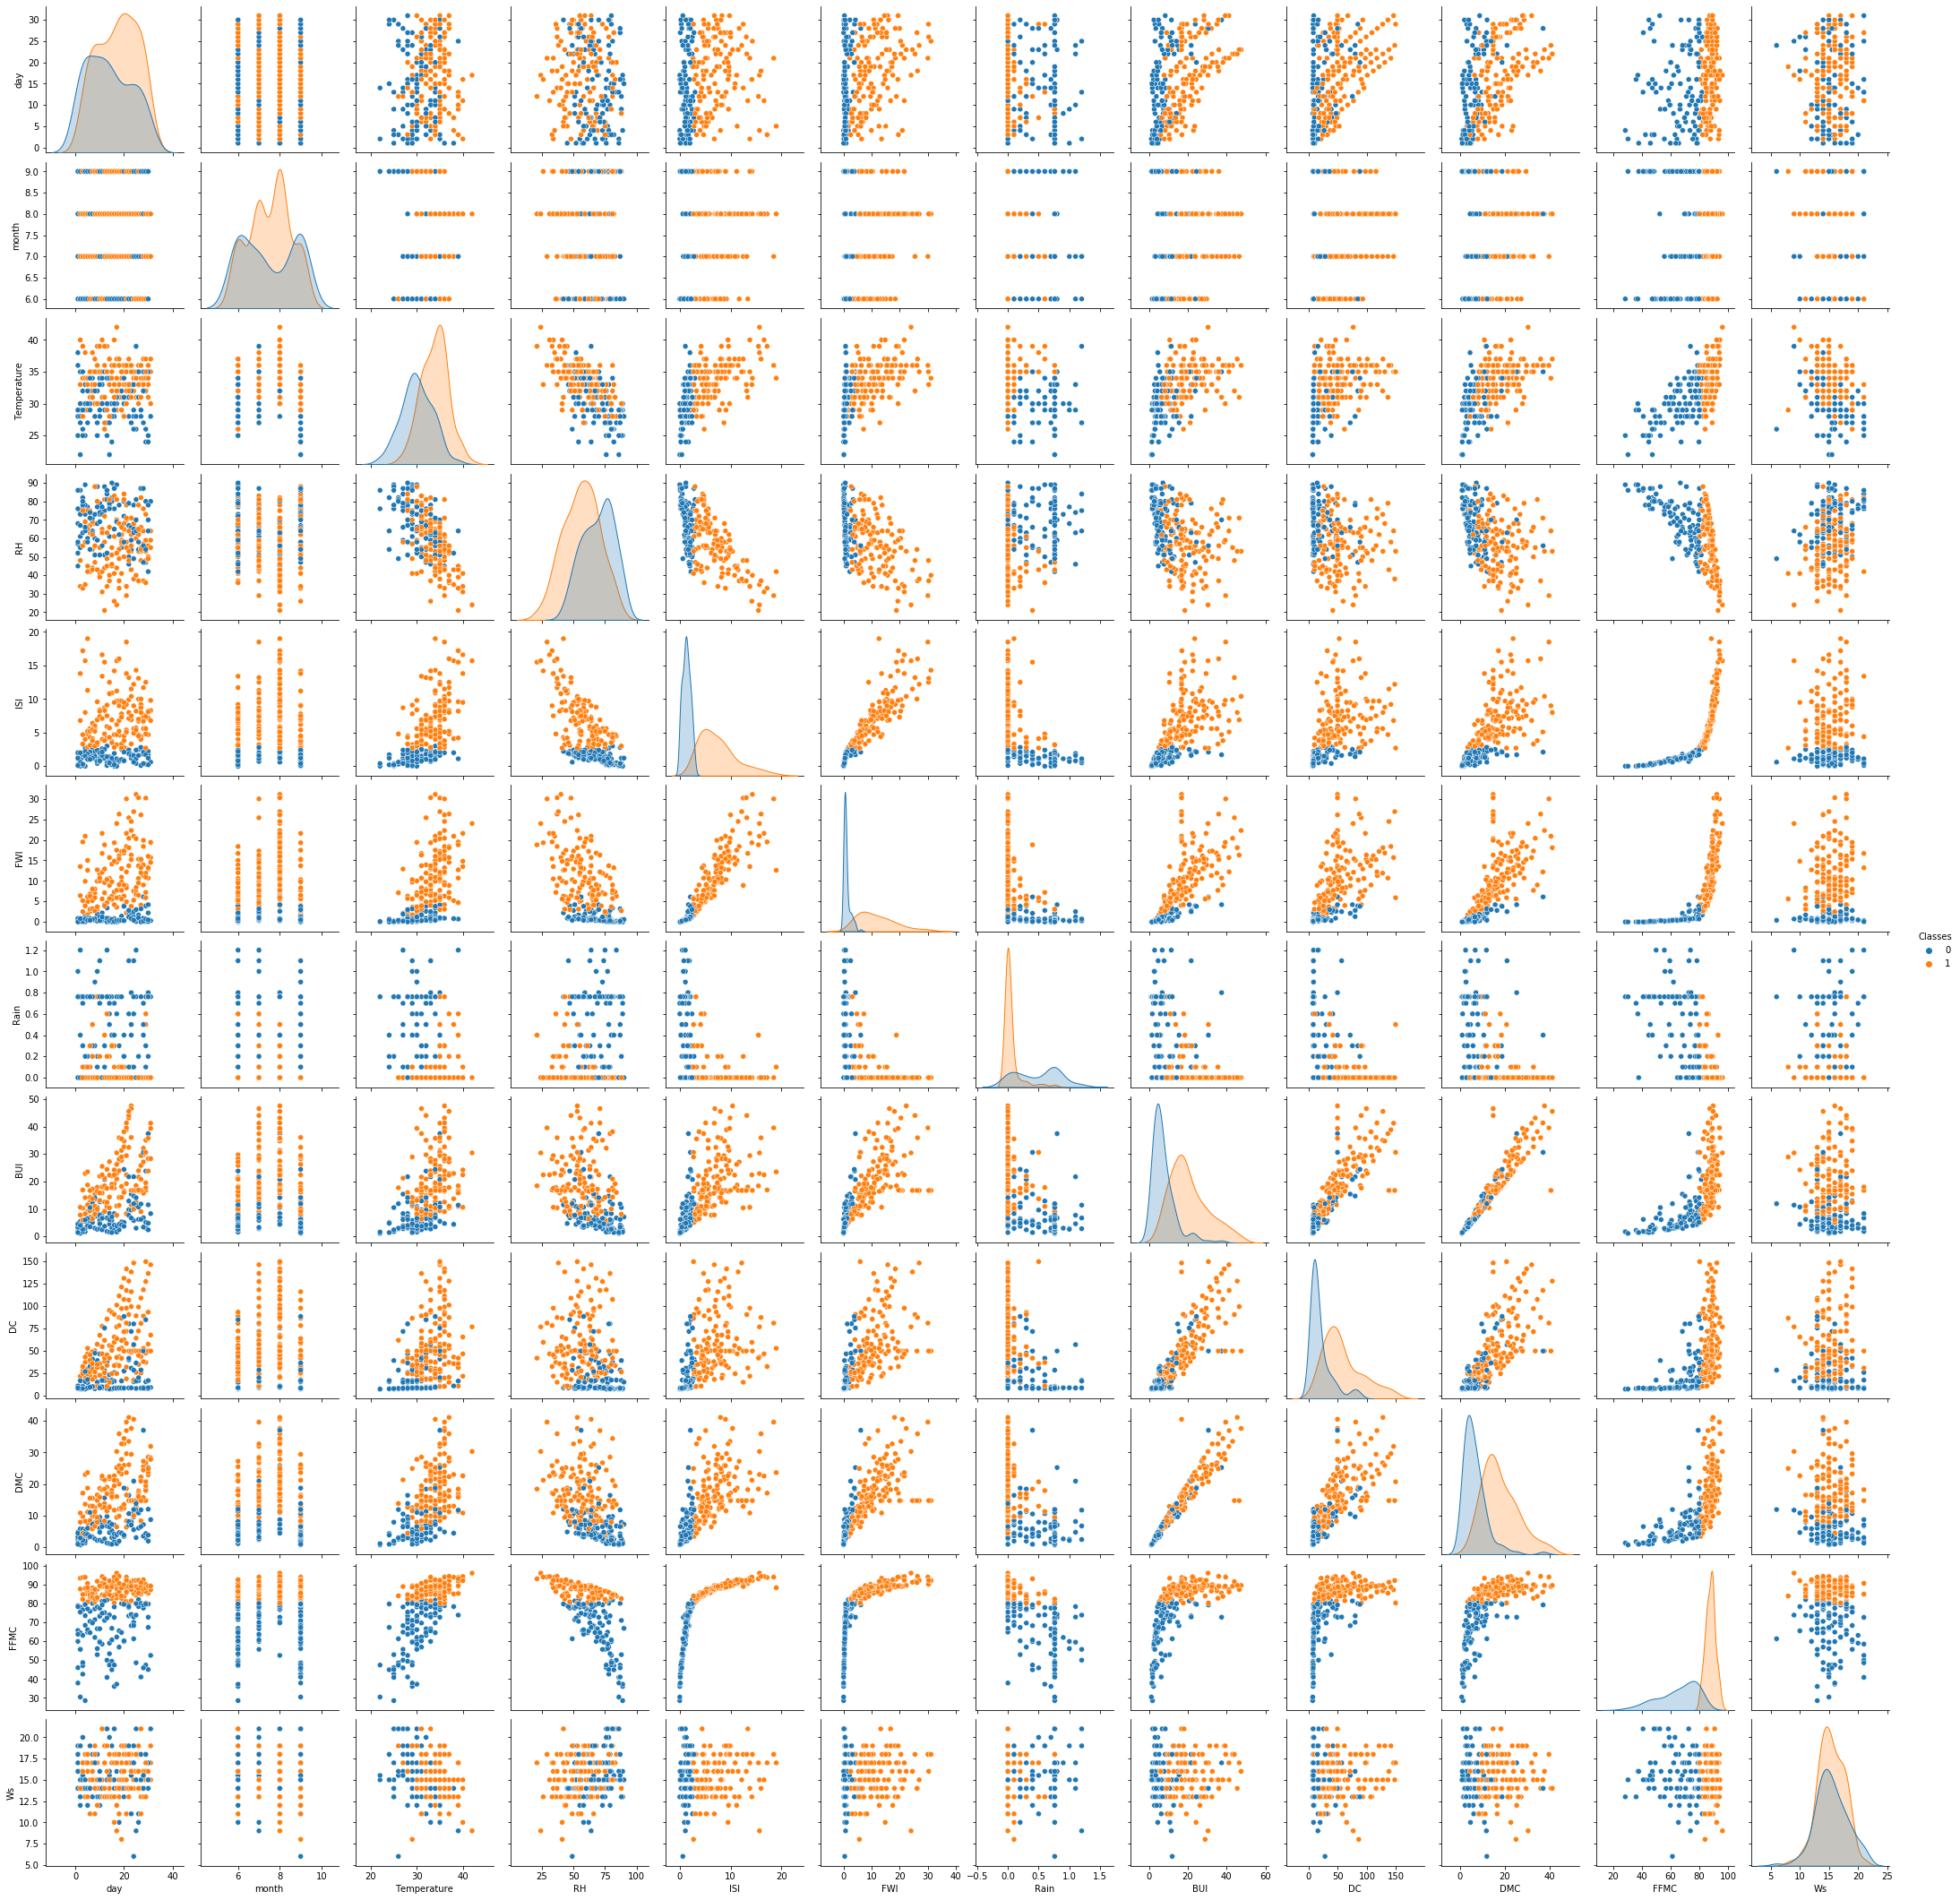

In [72]:
sns.pairplot(data,hue='Classes')

In [72]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [73]:
X.head(2)

,day,month,Temperature,RH,ISI,FWI,Rain,BUI,DC,DMC,FFMC,Ws
0,1,6,29,57,1.3,0.5,0,3.4,7.6,3.4,65.7,18
1,2,6,29,61,1.0,0.4,0.760905,3.9,7.6,4.1,64.4,13


In [74]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.3)

In [75]:
X_train.shape

(170, 12)

In [76]:
X_test.shape

(73, 12)

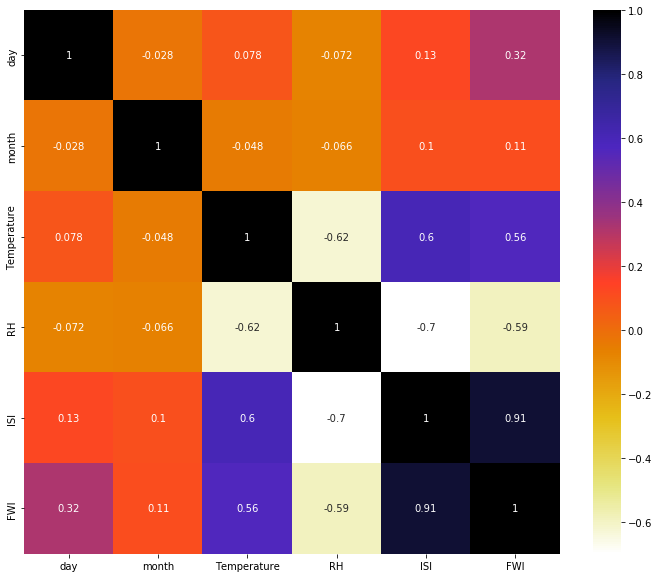

In [77]:
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor,annot= True, cmap=plt.cm.CMRmap_r)
plt.show()

In [78]:
#With the following function we can select highly correlated features
# it will remove the first feature that is corelated with anything other feature

def correlation(dataset,threshold):
    col_corr = set()  #set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range (len(corr_matrix.columns)):
        for j in range (i):
            if abs(corr_matrix.iloc[i,j]) > threshold:  # we are interested in absolute coeff value
                column_name = corr_matrix.columns[i]    # getting the name of column
                col_corr.add(column_name)
    return col_corr


In [79]:
corr_features = correlation(X_train, 0.9)
len(set(corr_features))

1

In [80]:
corr_features

{'FWI'}

In [ ]:
#Droping BUI and FWI feature from X_train and X_test

In [81]:
X_train = X_train.drop(corr_features,axis=1)
X_test = X_test.drop(corr_features,axis=1)

In [82]:
X_train.columns

Index(['day', 'month', 'Temperature', 'RH', 'ISI', 'Rain', 'BUI', 'DC', 'DMC',
       'FFMC', 'Ws'],
      dtype='object')

# Machine Learning Model Secelection - Classification

===========================================================================================

# Random Forest Classifier

In [83]:
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
classifer = RandomForestClassifier(n_estimators=15)
parameters = {'max_depth':[14,16,20,25,30,40,50],
             'min_samples_split':[2,3,4,5,8,10],
             'min_samples_leaf':[1,2,3]}
Randomforestclassifer = GridSearchCV(classifer,parameters)
Randomforestclassifer.fit (X_train, y_train)
r2_score = Randomforestclassifer.score(X_test,y_test)
print(r2_score,'= r2_score of Randomforestclassifer ')

0.9863013698630136 = r2_score of Randomforestclassifer 


In [84]:
print(Randomforestclassifer.best_params_)

{'max_depth': 14, 'min_samples_leaf': 2, 'min_samples_split': 3}


In [85]:
print(Randomforestclassifer.best_score_)

0.9882352941176471


# SVM

In [86]:
#svm
from sklearn import svm
classifier = svm
svc = svm.SVC(kernel='linear', C=1,gamma='auto').fit(X_train, y_train)
r2_score = svc.score(X_test,y_test)
print(r2_score,'= r2_score of SVM ')

0.958904109589041 = r2_score of SVM 


# Ada-boost classifier

In [87]:
#Adaboostclassifier
from sklearn.ensemble import AdaBoostClassifier
ada_classifier = AdaBoostClassifier(n_estimators=500,random_state=0,learning_rate=1)
AdaBoost_classifer = ada_classifier
AdaBoost_classifer.fit (X_train, y_train)
r2_score = AdaBoost_classifer.score(X_test,y_test)
print(r2_score,'= r2_score of AdaBoost_classifer ')

0.9863013698630136 = r2_score of AdaBoost_classifer 


# KNN Classifier

In [88]:
#standardization requried
# KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn_classifier = knn.fit(X_train,y_train)
pred = knn_classifier.predict(X_test)
confusion_matrix(pred,y_test)
r2_score = knn_classifier.score(X_test,y_test)
print(r2_score,'= r2_score of KNeighborsClassifier ')

0.8904109589041096 = r2_score of KNeighborsClassifier 


In [89]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

In [90]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88        34
           1       0.90      0.90      0.90        39

    accuracy                           0.89        73
   macro avg       0.89      0.89      0.89        73
weighted avg       0.89      0.89      0.89        73



# Decision tree

In [91]:
#Decision tree
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier()
parameters = {'max_depth':[2,6,8,10,12],
             'min_samples_split':[2,3,4,5],
             'min_samples_leaf':[1,2,3]}
decisiontreeClassifier = GridSearchCV(DTC,parameters)
decisiontreeClassifier.fit (X_train, y_train)
r2_score = decisiontreeClassifier.score(X_test,y_test)
print(r2_score,'= r2_score of decisiontreeClassifier ')

0.958904109589041 = r2_score of decisiontreeClassifier 


In [92]:
print(decisiontreeClassifier.best_params_)

{'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 5}


In [93]:
print(decisiontreeClassifier.best_score_)

0.9882352941176471


In [94]:
pred = decisiontreeClassifier.predict(X_test)

In [95]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.97      0.94      0.96        34
           1       0.95      0.97      0.96        39

    accuracy                           0.96        73
   macro avg       0.96      0.96      0.96        73
weighted avg       0.96      0.96      0.96        73



# GradientBoosting Classifier

In [96]:
from sklearn.ensemble import GradientBoostingClassifier
grad_class = GradientBoostingClassifier(n_estimators=500,random_state=0,learning_rate=1, max_depth=3)
grad_classifier = grad_class
grad_classifier.fit (X_train, y_train)
r2_score = grad_classifier.score(X_test,y_test)
print(r2_score,'= r2_score of grad_classifier ')

0.9726027397260274 = r2_score of grad_classifier 


In [ ]:
CLSSIFICATION MODELS- 

Random forest classifier       | 0.9863013698630136 
------------------------------------------------------
SVM                            | 0.958904109589041 
------------------------------------------------------
KNN classifier                 | 0.8904109589041096 
------------------------------------------------------
Ada-boost classifier           | 0.9863013698630136 
------------------------------------------------------
Decision tree classifier       | 0.958904109589041 
------------------------------------------------------
GradientBoosting Classifier    | 0.9726027397260274 

>>>>>>> For this Classification problem we are getting 98% accuracy for 2 models Ada-boost classifier and Random forest classifier so we are
selecting Random forest classifier with 0.98 accuracy

#  Machine Learning Model Secelection - Regression

=========================================================================================

# Liner Regression

In [97]:
from sklearn.linear_model import LinearRegression
lin_regressor=LinearRegression()
lin_regressor.fit(X_train,y_train)
r2_score = lin_regressor.score(X_test,y_test)
print(r2_score,'= r2_score of liner regressor ')

0.6507465389167382 = r2_score of liner regressor 


# DecisionTree Regressor

In [98]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import tree
treeregressor = DecisionTreeRegressor(criterion="entropy")
parameters = {'max_depth':[2,4,8,10,12,14,16],
             'min_samples_split':[2,3,4],
             'min_samples_leaf':[1,2]}
reg = tree.DecisionTreeRegressor()

TreeRegressor = GridSearchCV(reg,parameters)
TreeRegressor.fit(X_train,y_train)
tree = DecisionTreeRegressor(splitter="best",max_depth=10)
tree.fit(X_train,y_train)
r2_score = tree.score(X_test,y_test)
print(r2_score,'= r2_score of DecisionTreeRegressor ')

0.8898944193061841 = r2_score of DecisionTreeRegressor 


In [99]:
print(TreeRegressor.best_score_)
print(TreeRegressor.best_params_)

0.9580318986568986
{'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 4}


# Ridge Regressor

In [100]:
from sklearn.linear_model import Ridge
ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,60]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='r2')
ridge_regressor.fit(X_train,y_train)
r2_score = ridge_regressor.score(X_test,y_test)
print(r2_score,'= r2_score of ridge_regressor ')

0.6542832809807135 = r2_score of ridge_regressor 


In [101]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 60}
0.6630924617680926


# Lasso Regression

In [102]:
from sklearn.linear_model import Lasso
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='r2')
lasso_regressor.fit(X_train,y_train)

r2_score = lasso_regressor.score(X_test,y_test)
print(r2_score,'= r2_score of lasso_regressor ')

C:\Users\Swarupa\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.47641745321222384, tolerance: 0.003326470588235293
  positive)
C:\Users\Swarupa\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.295178551052933, tolerance: 0.0033110294117647066
  positive)
C:\Users\Swarupa\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.5132341906567426, tolerance: 0.003275735294117648
  positive)


0.6586592647832396 = r2_score of lasso_regressor 


In [103]:
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 0.01}
0.6622578851051287


# Random Forest Regression

In [104]:
from sklearn.ensemble import RandomForestRegressor
rand_reg = RandomForestRegressor(n_estimators=15)
parameters = {'max_depth':[2,4,8,10,12,14,16],
             'min_samples_split':[2,3,4],
             'min_samples_leaf':[1,2]}
Randomforestregressor = GridSearchCV(rand_reg,parameters)
Randomforestregressor.fit (X_train, y_train)
r2_score = Randomforestregressor.score(X_test,y_test)
print(r2_score,'= r2_score of Randomforestregressor ')

0.9444986313613765 = r2_score of Randomforestregressor 


In [105]:
print(Randomforestregressor.best_params_)
print(Randomforestregressor.best_score_)

{'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 4}
0.9479629443412889


# GradientBoosting Regressor

In [106]:
from sklearn.ensemble import GradientBoostingRegressor
grad_reg = GradientBoostingRegressor(n_estimators=1000,random_state=0,learning_rate=1)
grad_regressor = grad_reg
grad_regressor.fit (X_train, y_train)
r2_score = grad_regressor.score(X_test,y_test)
print(r2_score,'= r2_score of grad_regressor ')

0.827195408077761 = r2_score of grad_regressor 


# KNeighbors Regressor

In [107]:
from sklearn.neighbors import KNeighborsRegressor
knn_reg = KNeighborsRegressor(n_neighbors=2)
knn_regression = knn_reg.fit(X_train,y_train)
r2_score = knn_regression.score(X_test,y_test)
print(r2_score,'= r2_score of knn_regression ')

0.683446455505279 = r2_score of knn_regression 


In [ ]:
REGRESSION MODELS- 

Liner Regression               | 0.6507465389167382 
------------------------------------------------------
Lasso Regression               | 0.6586592647832396 
------------------------------------------------------
Ridge Regressor                | 0.6542832809807135 
------------------------------------------------------
KNeighbors Regressor           | 0.683446455505279 
------------------------------------------------------
DecisionTree Regressor         | 0.8898944193061841 
------------------------------------------------------
Random forest regression       | 0.9444986313613765 
------------------------------------------------------
GradientBoosting Regressor     | 0.827195408077761 


>> for Regression model we are selecting Random forest model with accuracy -- 0.94

# Pickle

In [112]:
import pickle
# Regression model--
pickle.dump(Randomforestregressor,open('forest_fire_reg_model.pkl','wb'))

In [113]:
pickle_model = pickle.load(open('forest_fire_reg_model.pkl','rb'))
#batch input
pickle_model.predict(X_test)

array([0.        , 0.        , 0.        , 0.73888889, 1.        ,
       0.51666667, 0.        , 0.        , 1.        , 1.        ,
       1.        , 0.        , 1.        , 0.58888889, 1.        ,
       0.        , 1.        , 0.        , 0.28333333, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 0.        , 0.        ,
       0.        , 0.        , 1.        , 0.88888889, 0.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       0.        , 1.        , 0.        , 1.        , 0.        ,
       0.        , 1.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 1.        , 0.48333333, 0.        ,
       0.        , 1.        , 1.        , 1.        , 1.        ,
       0.        , 1.        , 1.        , 1.        , 1.        ,
       0.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 0.        , 1.        ])

In [116]:
X_test.iloc[58]

day              12
month             9
Temperature      31
RH               72
ISI             3.8
Rain              0
BUI             9.1
DC             25.2
DMC             8.3
FFMC           84.2
Ws               14
Name: 227, dtype: object

In [118]:
data_dict={'day':30,
           'month':7,
           'Temperature':36,
           'RH':56,
           'ISI':8.2,
           'Rain':0,
           'BUI':23.8,
           'DC':57.1,
           'DMC':23.8,
           'FFMC':88.9,
           'Ws':16
          }

In [119]:
data_dict.values()

dict_values([30, 7, 36, 56, 8.2, 0, 23.8, 57.1, 23.8, 88.9, 16])

In [120]:
type(data_dict.values())

dict_values

In [121]:
list(data_dict.values())

[30, 7, 36, 56, 8.2, 0, 23.8, 57.1, 23.8, 88.9, 16]

In [122]:
pickle_model.predict([list(data_dict.values())])

array([1.])

In [ ]:
=================================================

In [123]:
# Pickle for classifier
pickle.dump(Randomforestclassifer,open('forest_fire_classifier_model.pkl','wb'))

In [124]:
pickle_classifier_model = pickle.load(open('forest_fire_classifier_model.pkl','rb'))
#batch input
pickle_classifier_model.predict(X_test)

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1], dtype=int64)

In [125]:
X_test.iloc[60]

day              18
month             6
Temperature      31
RH               78
ISI             0.7
Rain            0.3
BUI             2.4
DC                8
DMC             1.9
FFMC           56.9
Ws               14
Name: 17, dtype: object

In [126]:
data_classi_dict={'day':30,
           'month':7,
           'Temperature':36,
           'RH':56,
           'ISI':8.2,
           'Rain':0,
           'BUI':23.8,
           'DC':57.1,
           'DMC':23.8,
           'FFMC':88.9,
           'Ws':16
          }

In [127]:
data_classi_dict.values()

dict_values([30, 7, 36, 56, 8.2, 0, 23.8, 57.1, 23.8, 88.9, 16])

In [128]:
#converting into 2D
pickle_classifier_model.predict([list(data_classi_dict.values())])

array([1], dtype=int64)

In [132]:
# input data for rain --
X_test.iloc[7]

day                  11
month                 7
Temperature          34
RH                   56
ISI                 1.6
Rain           0.760905
BUI                 6.8
DC                  9.5
DMC                 7.1
FFMC               74.8
Ws                   15
Name: 164, dtype: object

In [133]:
X_test.head(2)

,day,month,Temperature,RH,ISI,Rain,BUI,DC,DMC,FFMC,Ws
93,2,9,22,86,0.0,0.760905,1.1,7,0.7,30.5,15
131,8,6,28,51,1.5,0.760905,7.3,7.4,7.7,71.4,17


In [ ]:
pickle_classifier_model.predict(X_test)